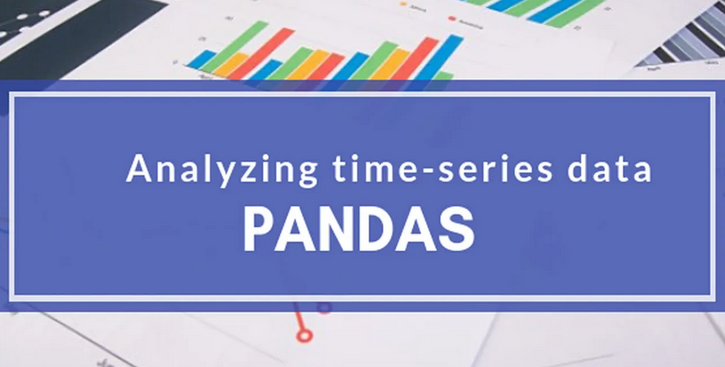

Dataset utilized for the purpose of illustration may be downloaded from the link below 


https://drive.google.com/file/d/1rpk9ZbNf-AsmVP17FzXyWWogUygihPGy/view?usp=sharing 

When importing financial time series data; the date&time value is read into a python dataframe as a non-datetime data type. 

In this exercise; we 

- Import a time series data into a python dataframe from a .csv file
- Parse the date&time column into a python understandable date format using strptime()
- Convert date to a python datetime object
- Take the dataset for a spin; using features available in datetime module.


### Import the libraries

In [43]:
import pandas as pd
from datetime import datetime

### Import the DataSet

In [46]:
df = pd.read_csv('D:\CRYPTO.csv')


df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


Date is stored as an object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


The date column is stored as an object and none of the datetime functions are applicable to it.

In [47]:
df.loc[1, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

### Transform Date column to a datetime object using  datetime.strptime method.

In [48]:
for i in range(len(df)):
    df.loc[i,'Date'] = datetime.strptime(df.loc[i,'Date'], "%Y-%m-%d %I-%p")
        
  
df['Date'] = pd.to_datetime(df['Date'])  

The Date column is now a Datetime Object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    23674 non-null  datetime64[ns]
 1   Symbol  23674 non-null  object        
 2   Open    23674 non-null  float64       
 3   High    23674 non-null  float64       
 4   Low     23674 non-null  float64       
 5   Close   23674 non-null  float64       
 6   Volume  23674 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ MB


### Take the Date column (now a datetime object) for a spin !

Extract the day name 

In [50]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [51]:
df.loc[1, 'Date'].day_name()

'Friday'

Extract the year

In [52]:
df.loc[1, 'Date'].year

2020

Extract the month

In [53]:
df.loc[1, 'Date'].month

3

Extact the day

In [54]:
df.loc[1, 'Date'].day

13

Extract the hour

In [55]:
df.loc[1, 'Date'].hour

19

Extract the  minute

In [56]:
df.loc[1, 'Date'].minute

0

Extract the second

In [57]:
df.loc[1, 'Date'].second

0

Set the Datetime column as index

In [60]:
df.set_index('Date', inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23674 entries, 2020-03-13 20:00:00 to 2017-07-01 11:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  23674 non-null  object 
 1   Open    23674 non-null  float64
 2   High    23674 non-null  float64
 3   Low     23674 non-null  float64
 4   Close   23674 non-null  float64
 5   Volume  23674 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.3+ MB


Check the maximum index (Date) value 

In [62]:
df.index.max()

Timestamp('2020-03-13 20:00:00')

Check the minimum index (Date) value 

In [63]:
df.index.min()

Timestamp('2017-07-01 11:00:00')

Number of days

In [64]:
df.index.max() - df.index.min()

Timedelta('986 days 09:00:00')

All values in a given year, e.g: year 2020

In [65]:
df.loc['2020'].head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


All values in a given year and month, e.g: year 2020, month = march

In [67]:
df.loc['2020-03'].head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


All values in a given year, month and day, e.g: year 2020, month = march, day =13

In [19]:
df.loc['2020-03-13'].head(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09


Subset the values between a given date range

In [68]:
df.loc['2020-03-13':'2020-03-14'].tail(2)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 01:00:00,ETHUSD,107.09,110.99,97.00,98.88,8079507.05
2020-03-13 00:00:00,ETHUSD,110.30,117.50,102.92,107.09,10329663.69


Use of cumprod()

Minimum of the Close, between a daterange

In [22]:
df.loc['2019-01':'2019-03']['Close'].min()

101.3

Resample the data and find the weekly mean of the closing price

In [70]:
df[['Close']].resample('W').mean().head(2)

,Close
Date,
2017-07-02,268.202162
2017-07-09,261.062083


Monthly mean of all the values in the Dataframe

In [24]:
df.resample('M').mean().head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-31,220.118963,222.516126,217.489018,220.010969,2.480603e+06
2017-08-31,298.258616,300.082661,296.421465,298.511815,2.056356e+06


Monthly - column wise customized aggregate stats

In [25]:
df.resample('M').agg({'Close':'mean','Volume':'sum','Low':'min','Open':'max'}).head()

,Close,Volume,Low,Open
Date,,,,
2017-07-31,220.010969,1.818282e+09,130.26,292.54
2017-08-31,298.511815,1.529929e+09,200.82,389.78
2017-09-30,298.524639,1.678947e+09,202.25,395.54
2017-10-31,305.649772,8.155377e+08,275.46,348.45
2017-11-30,355.646292,1.974056e+09,278.88,508.82


180 days rolling sum of the volume

In [71]:
df[['Volume']].rolling(180).sum().tail(2)

,Volume
Date,
2017-07-01 12:00:00,2.873349e+08
2017-07-01 11:00:00,2.867747e+08


180 days rolling mean of all columns of a dataframe

In [27]:
df.rolling(180).mean().tail(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-01 12:00:00,264.776389,266.703111,262.333722,264.618778,1.596305e+06
2017-07-01 11:00:00,264.987000,266.886556,262.510333,264.776389,1.593193e+06


Downsampling to half-hourly /forward fill 

In [28]:
df.resample('30min').ffill().head(5)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.1,275.01,679358.87
2017-07-01 11:30:00,ETHUSD,279.98,279.99,272.1,275.01,679358.87
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87
2017-07-01 12:30:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.0,268.79,3010787.99


Downsampling to half-hourly /backward fill 

In [72]:
df.resample('30min').backfill().head(5)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.1,275.01,679358.87
2017-07-01 11:30:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.0,274.83,824362.87
2017-07-01 12:30:00,ETHUSD,274.83,274.93,265.0,268.79,3010787.99
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.0,268.79,3010787.99


30 days rolling correlation  

In [30]:
df['Open'].rolling(30).corr(df['Close']).tail()

Date
2017-07-01 15:00:00    0.813183
2017-07-01 14:00:00    0.769305
2017-07-01 13:00:00    0.716732
2017-07-01 12:00:00    0.687003
2017-07-01 11:00:00    0.721752
dtype: float64

30 days rolling covariance

In [31]:
df['Open'].rolling(30).cov(df['Close']).tail()

Date
2017-07-01 15:00:00    41.234854
2017-07-01 14:00:00    32.377786
2017-07-01 13:00:00    26.506734
2017-07-01 12:00:00    22.494758
2017-07-01 11:00:00    23.876443
dtype: float64

30 days exponentially weighted moving mean

In [32]:
df['Close'].ewm(span=30).mean().tail(2)

Date
2017-07-01 12:00:00    266.866573
2017-07-01 11:00:00    267.391955
Name: Close, dtype: float64

To check if the Date index is unique or not

In [33]:
df.index.is_unique

True

check the entry with count >1

In [73]:
grouped = df.groupby(level=0)
grouped.count().head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-01 11:00:00,1,1,1,1,1,1
2017-07-01 12:00:00,1,1,1,1,1,1
2017-07-01 13:00:00,1,1,1,1,1,1
2017-07-01 14:00:00,1,1,1,1,1,1
2017-07-01 15:00:00,1,1,1,1,1,1
